In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt


sys.path.append('../')

from BGS import BGS
from FileEmcee import FileEmcee
from EmceeRun import EmceeRun
from Plotter import Plotter
from VMaxDensity import VmaxDensity
from ZSchechterModel import ZSchechterModel
from Fileh5 import Fileh5

In [2]:
bgs = BGS('BGS_ANY_full.provabgs.lite.hdf5', is_bgs_bright=True)

emcee_file_02 = Fileh5(folder='emcee_runs', info_file='0.0_0.2')
emcee_file_03 = Fileh5(folder='emcee_runs', info_file='0.0_0.3')
emcee_file_04 = Fileh5(folder='emcee_runs', info_file='0.0_0.4')

emcee_run_02 = EmceeRun(emcee_file_02)
emcee_run_03 = EmceeRun(emcee_file_03)
emcee_run_04 = EmceeRun(emcee_file_04)

In [3]:
plotter02 = Plotter(bgs, emcee_run_02)
plotter03 = Plotter(bgs, emcee_run_03)
plotter04 = Plotter(bgs, emcee_run_04)

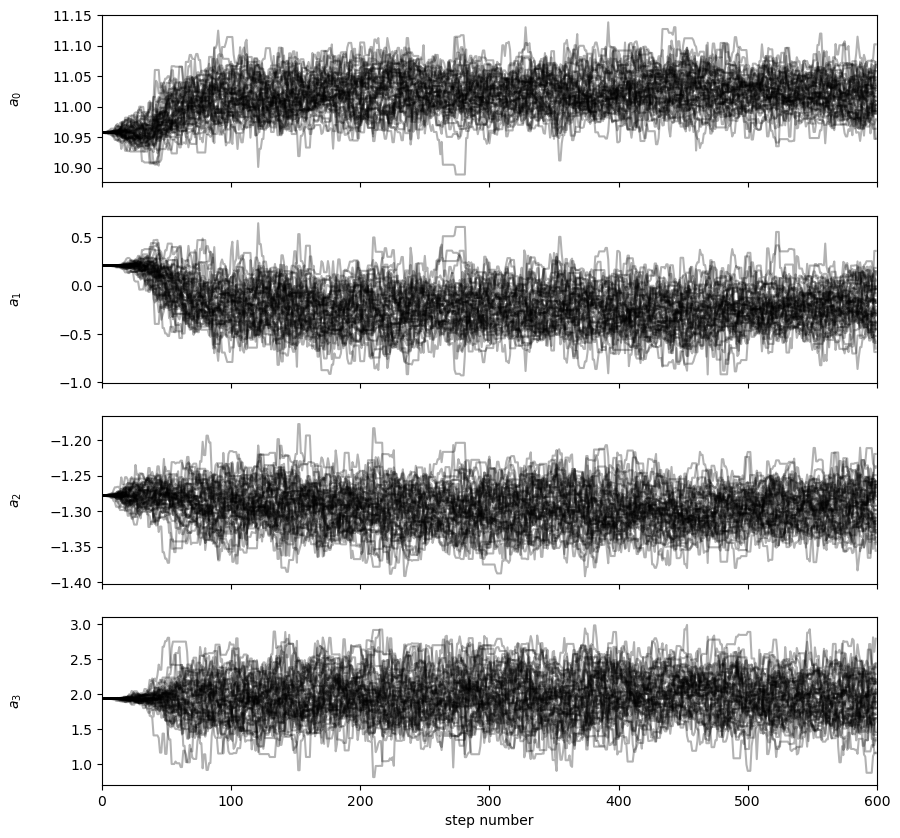

In [4]:
plotter02.plot_emcee_samples()

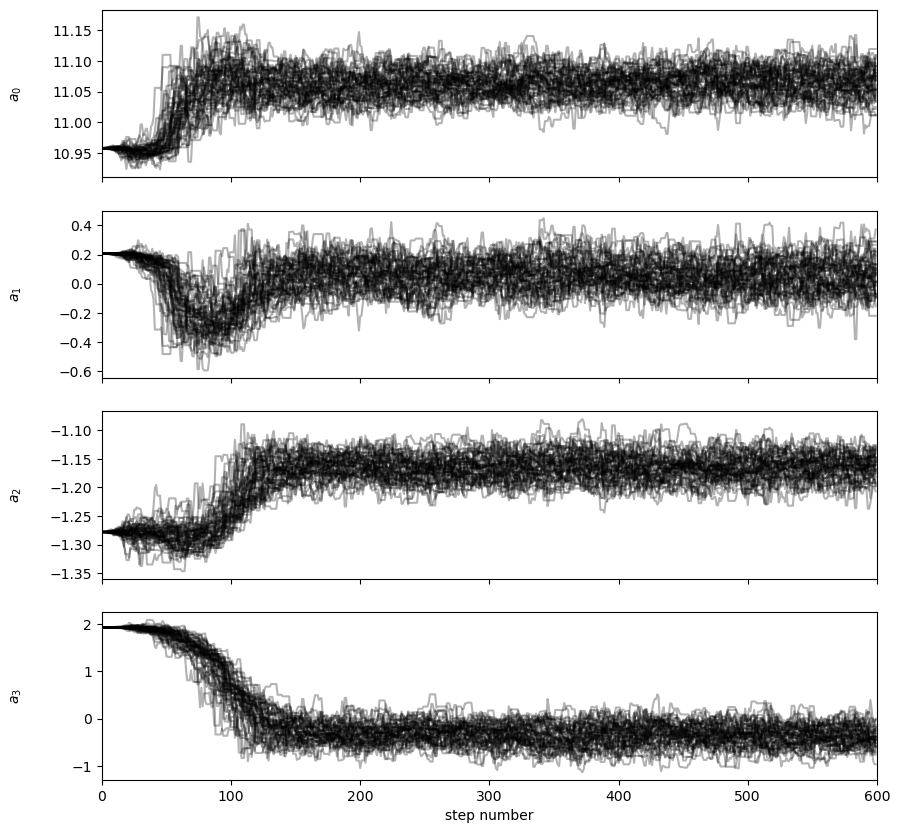

In [5]:
plotter03.plot_emcee_samples()

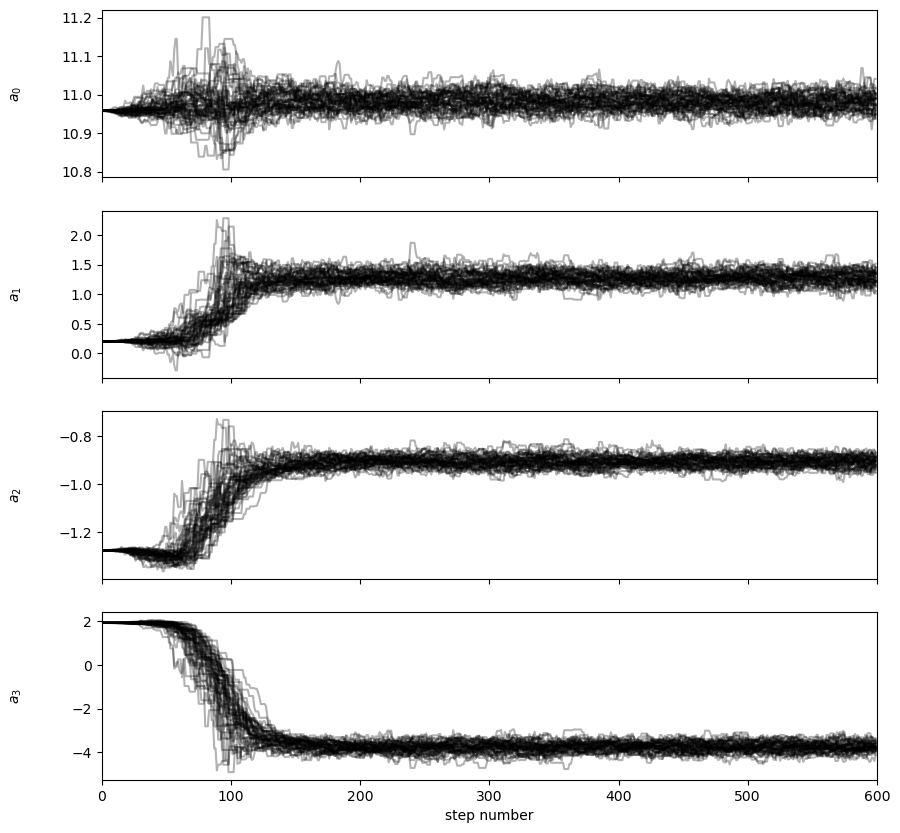

In [6]:
plotter04.plot_emcee_samples()

In [7]:
emcee_run_02.set_best_params(discard=150)
emcee_run_03.set_best_params(discard=150)
emcee_run_04.set_best_params(discard=150)

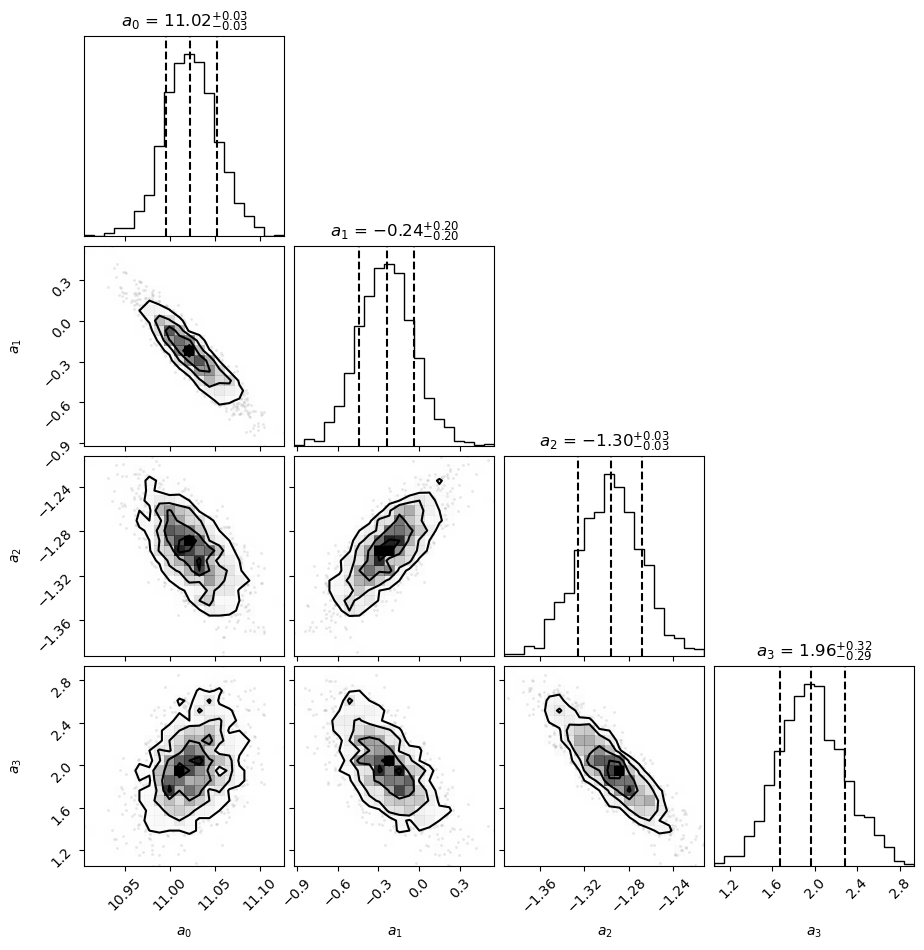

In [8]:
Plotter.plot_emcee_corner(emcee_run_02.flat_samples, emcee_run_02.labels4)

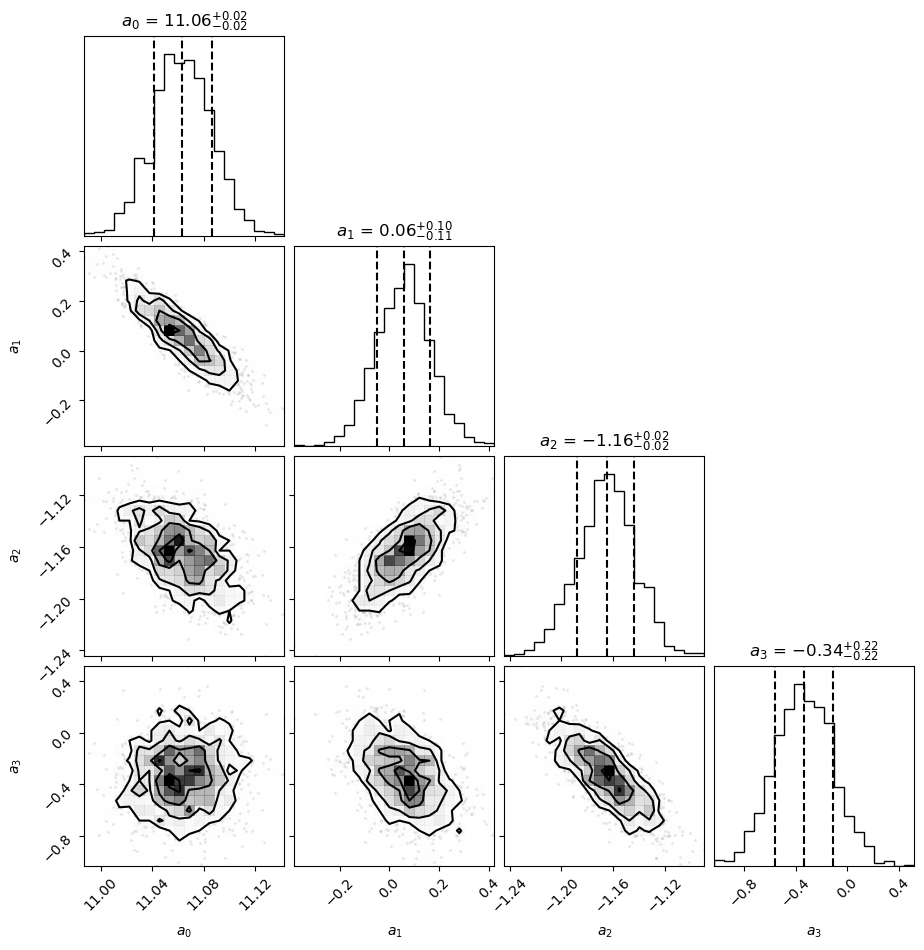

In [9]:
Plotter.plot_emcee_corner(emcee_run_03.flat_samples, emcee_run_03.labels4)

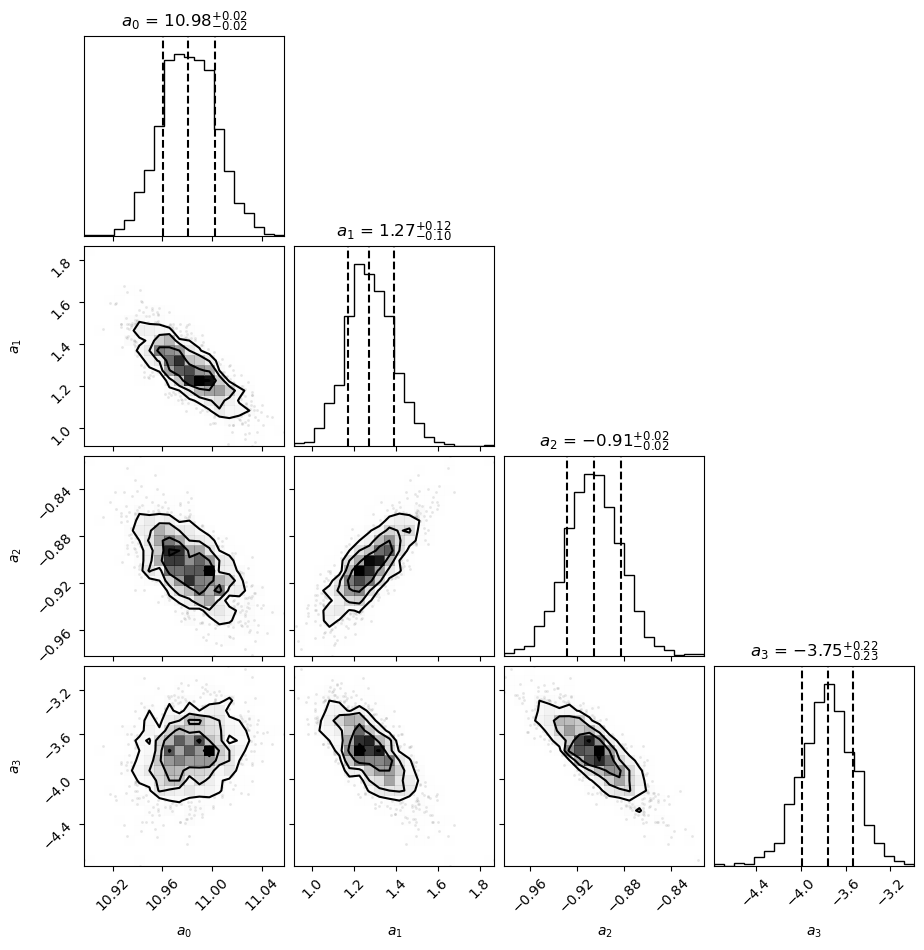

In [10]:
Plotter.plot_emcee_corner(emcee_run_04.flat_samples, emcee_run_04.labels4)

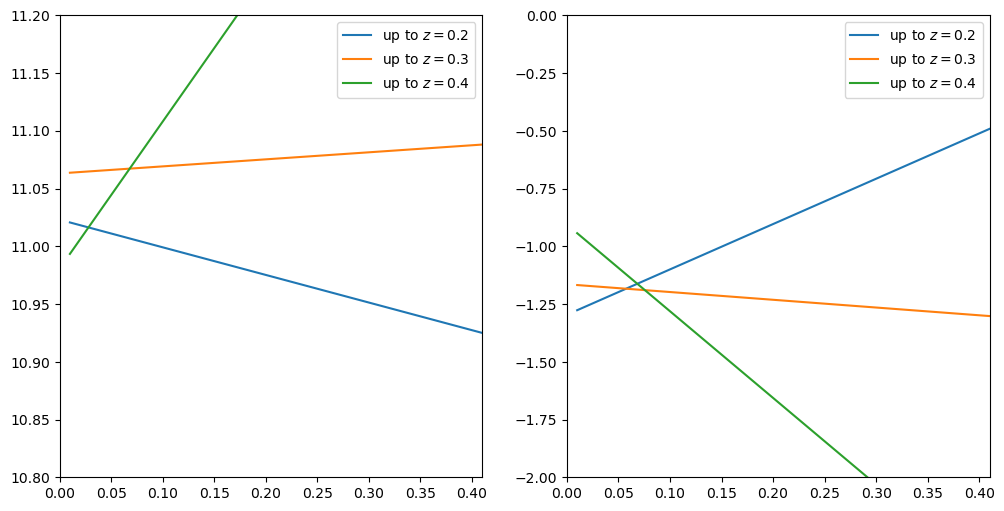

In [14]:
z = np.linspace(0.01,1,5)

best_params02 = emcee_run_02.get_best_params()
best_params03 = emcee_run_03.get_best_params()
best_params04 = emcee_run_04.get_best_params()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(z, best_params02[0] + best_params02[1]*z, label=r'up to $z=0.2$')
plt.plot(z, best_params03[0] + best_params03[1]*z, label=r'up to $z=0.3$')
plt.plot(z, best_params04[0] + best_params04[1]*z, label='up to $z=0.4$')
plt.xlim(0,0.41)
plt.ylim(10.8, 11.2)
plt.legend()

plt.subplot(1,2,2)
plt.plot(z, best_params02[2] + best_params02[3]*z, label=r'up to $z=0.2$')
plt.plot(z, best_params03[2] + best_params03[3]*z, label=r'up to $z=0.3$')
plt.plot(z, best_params04[2] + best_params04[3]*z, label='up to $z=0.4$')
plt.xlim(0,0.41)
plt.ylim(-2,0)
plt.legend()

In [12]:
vmax_hist = VmaxDensity(bgs.file, is_bgs_bright=True)

/Users/federico/Library/CloudStorage/OneDrive-UniversityCollegeLondon/PhD/PhD_project/bgs_psmf/nb/../VMaxDensity.py:19: RuntimeWarning: divide by zero encountered in divide
  _w = self.w_spec / (self.vmax.clip(v_zmin, v_zmax) - v_zmin)


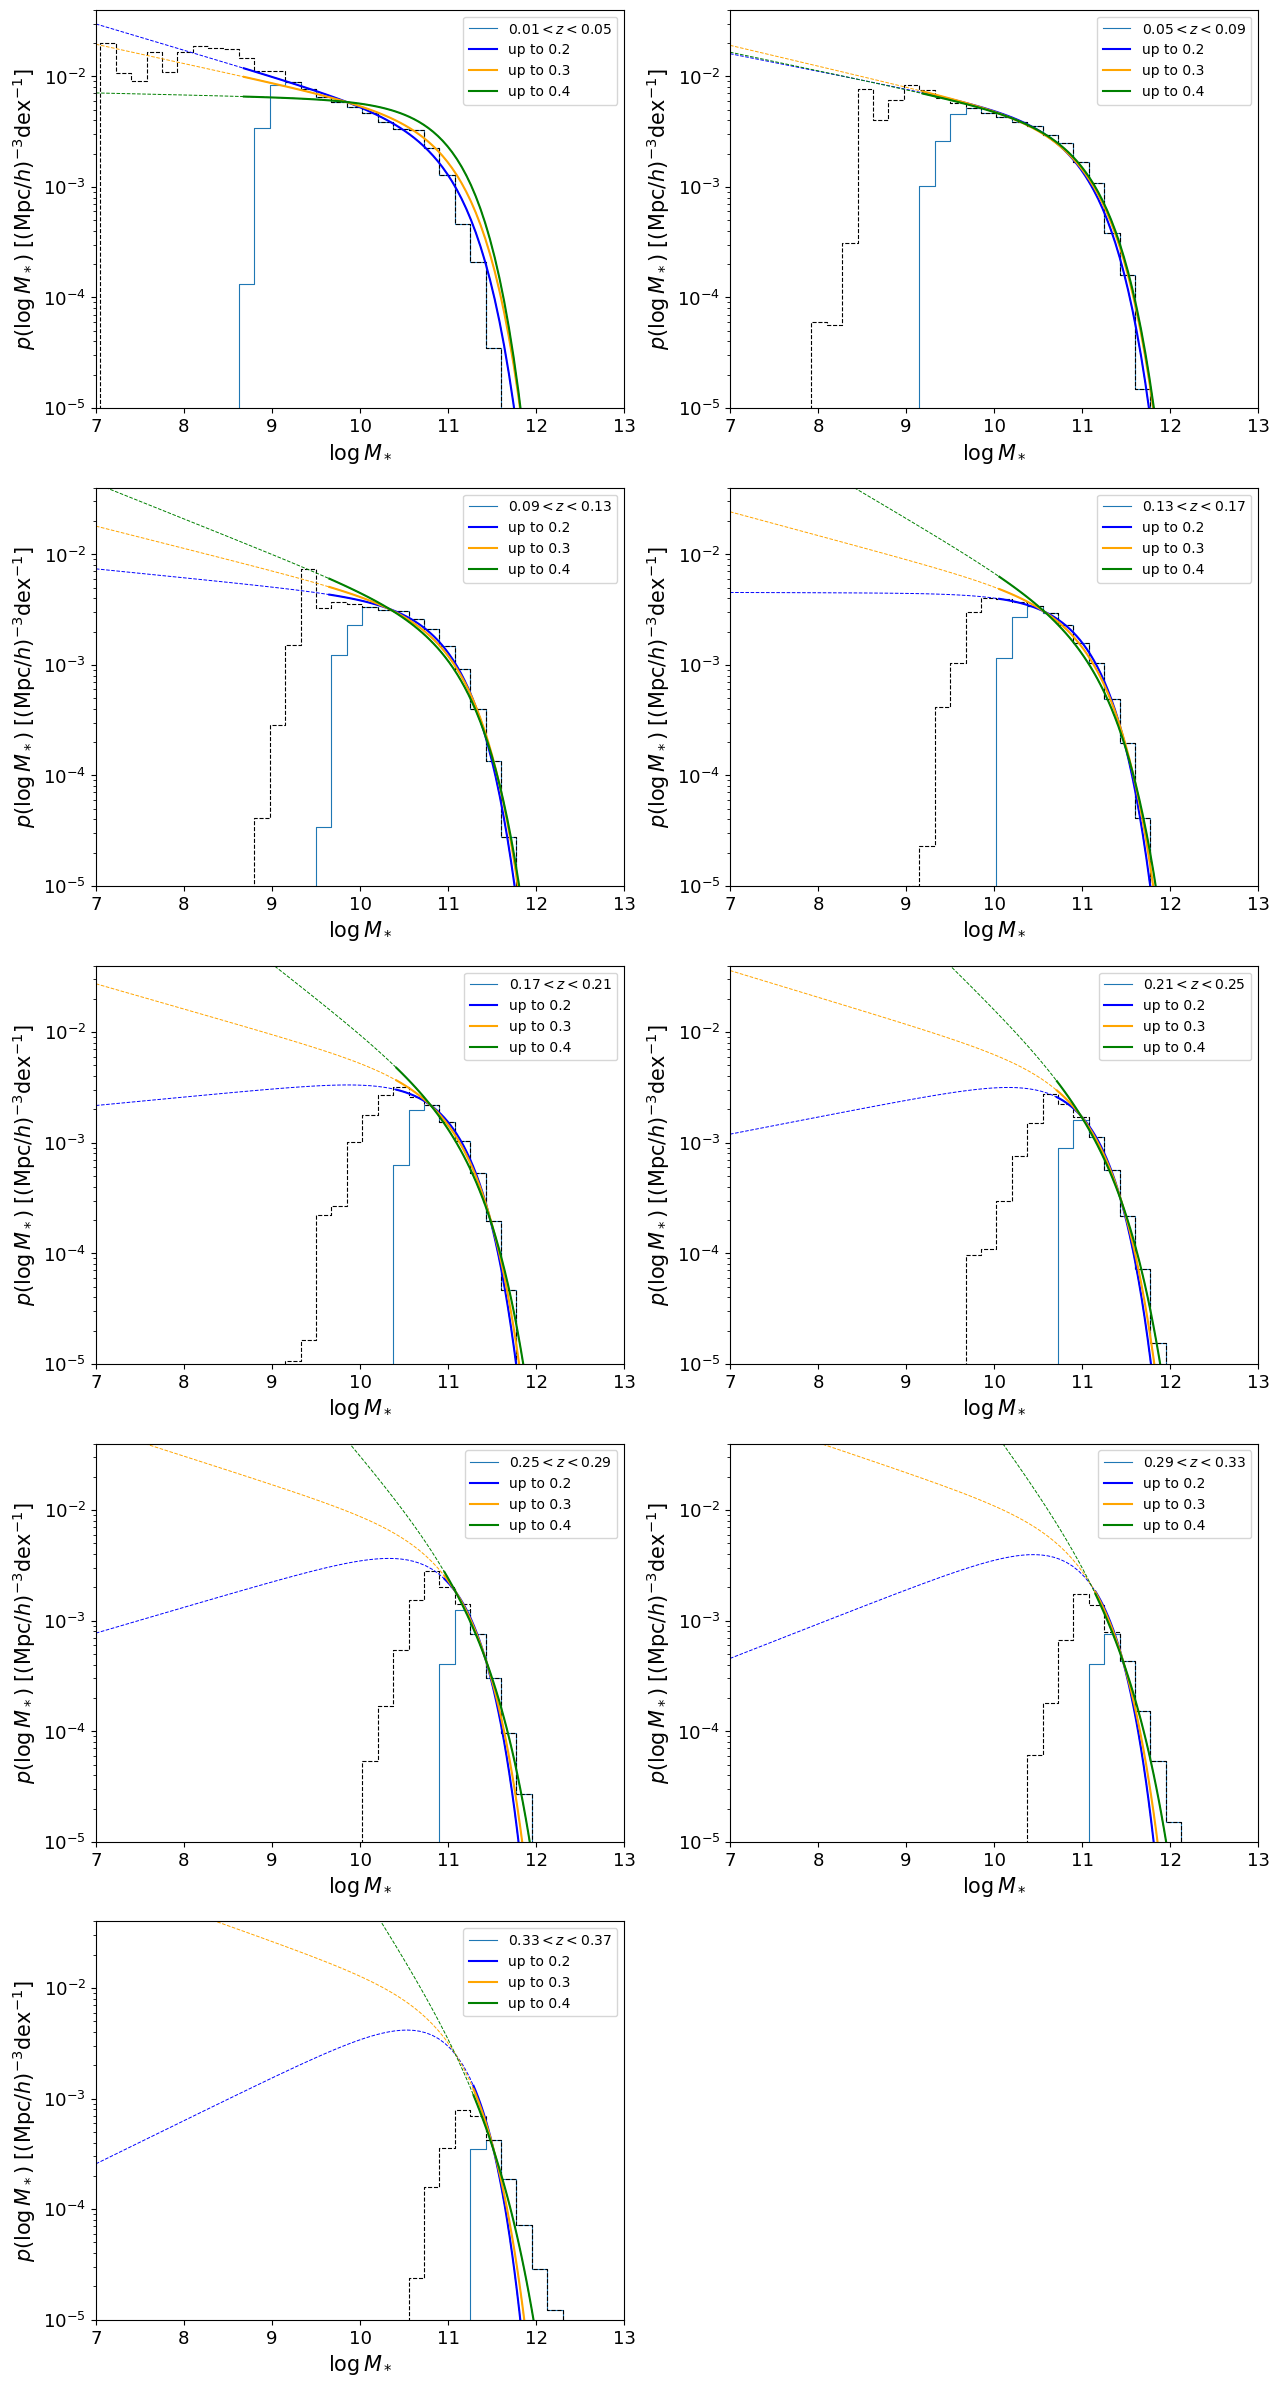

In [13]:
zmins = np.array([0.01 + 0.04 * i for i in range(9)])
zmaxs = np.array([0.05 + 0.04 * i for i in range(9)])

x_lin_ext = np.linspace(7, 14, 100)

fig = plt.figure(figsize=(15,30))

plot_params_ext02 = {'color': 'blue', 'linestyle':'--', 'linewidth':0.7}
plot_params02 = {'color':'blue', 'linestyle':'-', 'label':'up to 0.2'}

plot_params_ext03 = {'color': 'orange', 'linestyle':'--', 'linewidth':0.7}
plot_params03 = {'color':'orange', 'linestyle':'-', 'label':'up to 0.3'}

plot_params_ext04 = {'color': 'green', 'linestyle':'--', 'linewidth':0.7}
plot_params04 = {'color':'green', 'linestyle':'-', 'label':'up to 0.4'}


for i, zmin, zmax, z0 in zip(range(9), zmins, zmaxs, zmins + (zmaxs - zmins)/2.):
    plt.subplot(5,2,i+1)
    h, b, _h, _b = vmax_hist.histogram_norm(zmin, zmax)
    z_smf = ZSchechterModel(bgs, zmin, zmax, z0)
    
    n02 = z_smf.normalisation(best_params02)
    n03 = z_smf.normalisation(best_params03)
    n04 = z_smf.normalisation(best_params04)


    x_lin = np.linspace(z_smf.mlim.min(), 14, 100)

    # Plot histogram
    Plotter.plot_vmax_hist(h, b, _h, _b, **{'label':f'${zmin:.2f}< z <{zmax:.2f}$'})
    
    # up to z = 0.2
    Plotter.plot_zschechter(x_lin, z0, n02, best_params02, **plot_params02)
    Plotter.plot_zschechter(x_lin_ext, z0, n02, best_params02, **plot_params_ext02)

    # up to z = 0.3
    Plotter.plot_zschechter(x_lin, z0, n03, best_params03, **plot_params03)
    Plotter.plot_zschechter(x_lin_ext, z0, n03, best_params03, **plot_params_ext03)

    # up to z = 0.4
    Plotter.plot_zschechter(x_lin, z0, n04, best_params04, **plot_params04)
    Plotter.plot_zschechter(x_lin_ext, z0, n04, best_params04, **plot_params_ext04)


    # inds = np.random.randint(len(emcee_run.flat_samples), size=100)
    # for ind in inds:
    #     z_smf_err = ZSchechterModel(bgs, zmin, zmax, z0)
    
    #     n_err = z_smf_err.normalisation(emcee_run.flat_samples[ind])
    #     Plotter.plot_zschechter(x_lin_ext, z0, n_err, emcee_run.flat_samples[ind], **{'alpha':0.2})

    
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend(loc='best')
plt.show()    